In [1042]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
print(tf.__version__)
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from numpy import unique
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import plot_model

2.4.1


In [1043]:
DATAattack=pd.read_excel (r'C:\Users\f52z326\OneDrive - Montana State University\Desktop\New folder (3)\New folder (2)\DATAattack.xlsx')

In [1044]:
X = DATAattack.iloc[:,0:5]
y = DATAattack.iloc[:,10:78]
ya = DATAattack.iloc[:,78:83]
print(X.shape)
print(y.shape)
print(ya.shape)
n_features=X.shape[1]

(6000, 5)
(6000, 68)
(6000, 5)


In [1045]:
scaler = StandardScaler()
# fit scaler on data
scaler.fit(X)
# apply transform
X= scaler.transform(X)
scaler1 = StandardScaler()
scaler1.fit(y)
y = scaler1.transform(y)

In [1046]:
x_train, x_test, y_train, y_test,ya_train,ya_test = train_test_split(X, y,ya, test_size=0.33, random_state=1)
print(x_train.shape)
print(y_train.shape)
print(ya_train.shape)
n_features=x_train.shape[1]

(4020, 5)
(4020, 68)
(4020, 5)


In [1047]:
n_features

5

In [1048]:
visible = Input(shape=(n_features,))
hidden1 = Dense(200, activation='relu', kernel_initializer='he_normal')(visible)
hidden2 = Dense(100, activation='relu', kernel_initializer='he_normal')(hidden1)

In [1049]:
y_train.shape[1]

68

In [1050]:
out_reg = Dense(68, activation='linear')(hidden2)

In [1051]:
#out_clas = Dense(8760, activation='softmax')(hidden2)
out_clas = Dense(5, activation='softmax')(hidden2)

In [24]:
 pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24572 sha256=a68d053c45bed5ca2fa3bd025077221b55db2b1f242a7286338655192174e065
  Stored in directory: c:\users\f52z326\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [25]:
conda install -c anaconda graphviz=2.38.0

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\f52z326\Anaconda3

  added / updated specs:
    - graphviz=2.38.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.10.14 |                0         159 KB  anaconda
    conda-4.12.0               |   py38haa95532_0        14.5 MB
    graphviz-2.38              |       hfd603c8_2        37.7 MB  anaconda
    openssl-1.1.1h             |       he774522_0         5.8 MB  anaconda
    ------------------------------------------------------------
                                           Total:        58.1 MB

The following NEW packages will be INSTALLED:

  graphviz           anaconda/win-64::graphviz-2.38-hfd603c8_2

The following packages will be UPDATED:

  conda                               4.11.0-py38haa95532_0 --> 4.12.0-py38haa95532_0

The following packages will be SUP

In [27]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


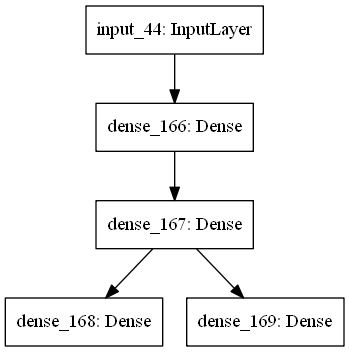

In [1052]:
model = Model(inputs=visible, outputs=[out_reg, out_clas])
tf.keras.utils.plot_model(model)

In [1053]:
model.compile(loss=['mse','categorical_crossentropy'], metrics=['mae','mse'],optimizer='SGD')

In [1054]:
example_batch = x_train[:10]
example_result = model.predict(example_batch)
example_result

[array([[-0.44672206, -0.6132491 , -1.030193  ,  1.5786815 , -0.5421294 ,
          0.8018384 ,  0.8665696 , -1.9030236 ,  0.6103785 ,  0.3903808 ,
         -0.5852562 ,  2.650032  ,  0.31517363, -0.28965792, -0.31223065,
         -0.46627504, -0.7446203 ,  1.6146872 ,  2.0379515 , -0.06213626,
         -1.128218  ,  0.09143376,  0.4464783 ,  0.7837953 , -1.4906479 ,
          0.19809043,  0.9869286 ,  0.01065606,  1.0809283 ,  0.21225506,
         -0.19158989, -0.29719514,  0.2302812 ,  0.30126798, -0.99969435,
         -0.14682066,  2.2514236 ,  0.5585688 , -2.4389346 , -1.1420728 ,
         -1.6774793 ,  0.13232623,  0.7826575 ,  0.6165801 , -1.0490906 ,
          1.6216265 ,  0.20473787,  0.86421347,  0.5512133 ,  0.00730598,
          0.14674991,  0.34869128,  1.2240926 , -0.98542225,  0.36591268,
         -0.6773504 ,  0.02654487, -0.88999176, -0.1578048 , -1.0468007 ,
          0.75386894, -1.0133302 , -0.56289315,  1.3825947 , -0.39120334,
         -0.8331228 ,  1.3946469 ,  1.

In [1055]:
EPOCHS = 200
history = model.fit(
  x_train, [y_train,ya_train],
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, dense_168_loss:48.1337,  dense_168_mae:1.4825,  dense_168_mse:48.1337,  dense_169_loss:0.5440,  dense_169_mae:0.2118,  dense_169_mse:0.0686,  loss:48.6777,  val_dense_168_loss:1.1090,  val_dense_168_mae:0.7757,  val_dense_168_mse:1.1090,  val_dense_169_loss:0.1802,  val_dense_169_mae:0.2134,  val_dense_169_mse:0.0535,  val_loss:1.2892,  
....................................................................................................
Epoch: 100, dense_168_loss:0.9956,  dense_168_mae:0.7189,  dense_168_mse:0.9956,  dense_169_loss:0.1576,  dense_169_mae:0.2118,  dense_169_mse:0.0518,  loss:1.1532,  val_dense_168_loss:1.0493,  val_dense_168_mae:0.7353,  val_dense_168_mse:1.0493,  val_dense_169_loss:0.1802,  val_dense_169_mae:0.2134,  val_dense_169_mse:0.0534,  val_loss:1.2295,  
....................................................................................................

In [1056]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,dense_168_loss,dense_169_loss,dense_168_mae,dense_168_mse,dense_169_mae,dense_169_mse,val_loss,val_dense_168_loss,val_dense_169_loss,val_dense_168_mae,val_dense_168_mse,val_dense_169_mae,val_dense_169_mse,epoch
195,1.152104,0.994464,0.157641,0.727332,0.994464,0.211754,0.051754,1.228308,1.048147,0.180161,0.743575,1.048147,0.213433,0.053433,195
196,1.152104,0.994464,0.157641,0.727363,0.994464,0.211754,0.051754,1.228308,1.048147,0.180161,0.743587,1.048147,0.213433,0.053433,196
197,1.152103,0.994462,0.157641,0.727325,0.994462,0.211754,0.051754,1.228306,1.048145,0.180161,0.743601,1.048145,0.213433,0.053433,197
198,1.152104,0.994462,0.157641,0.727353,0.994462,0.211754,0.051754,1.228307,1.048146,0.180161,0.743611,1.048146,0.213433,0.053433,198
199,1.152103,0.994462,0.157641,0.727381,0.994462,0.211754,0.051754,1.228308,1.048147,0.180161,0.743620,1.048147,0.213433,0.053433,199


In [626]:
#plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

In [627]:
#plotter.plot({'Basic': history}, metric = "mae")
#plt.ylim([0, 10])
#plt.ylabel('MAE')

In [628]:
#model.fit(x_train, [y_train,ya_train], epochs=150, batch_size=32, verbose=2)

In [344]:
DATAattacktest=pd.read_excel (r'C:\Users\f52z326\OneDrive - Montana State University\Desktop\New folder (3)\New folder (2)\DATAattacktest.xlsx')

In [345]:
Xtest = DATAattacktest.iloc[:,0:10]
ytest = DATAattacktest.iloc[:,10:78]
yatest = DATAattacktest.iloc[:,78:]
print(Xtest.shape)
print(ytest.shape)
print(yatest.shape)
n_features=DATAattacktest.shape[1]

(2760, 10)
(2760, 68)
(2760, 10)


In [1057]:
yhat1,yhat2 = model.predict(x_test)

In [960]:
#yhat2

In [1058]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [1059]:
yhat1 = scaler1.inverse_transform(yhat1)

In [1060]:
y_test= scaler1.inverse_transform(y_test)

In [1040]:
#x_test= scaler.inverse_transform(x_test)

In [1061]:
error = mean_absolute_error(y_test, yhat1)

In [1062]:
error1 = mean_squared_error(y_test, yhat1)

In [1085]:
error1*100


0.003774937057223442

In [1086]:
error*100

0.22840211831883808

In [253]:
#error *100

In [1074]:
yatest

,O1a,O9a,O35a,O36a,O41a,O46a,O49a,O53a,O57a,O63a
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2755,0,0,0,0,0,0,0,0,0,0
2756,0,0,0,0,0,0,0,0,0,0
2757,0,0,0,0,0,0,0,0,0,0
2758,0,0,0,0,0,0,0,0,0,0


In [255]:
#yhat1

In [1065]:
print('MAE: %.3f' % error)

MAE: 0.002


In [1066]:
from sklearn.metrics import accuracy_score

In [430]:
#np.shape(yhat2)

In [1067]:
yhat2 = np.argmax(yhat2, axis=1)

In [432]:
#np.shape(yhat2)

In [433]:
#np.shape(yatest)

In [1068]:
yatest2 = np.argmax(ya_test.to_numpy(),axis=1)

In [1075]:
yatest2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1076]:
yhat2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1069]:
acc = accuracy_score(yatest2, yhat2)

In [1070]:
#np.shape(yhat2)

In [1071]:
from sklearn.metrics import confusion_matrix

In [1072]:
acc

1.0

In [1073]:
confusion_mat = confusion_matrix(yatest2, yhat2)
print(confusion_mat)

[[1980]]


In [1077]:
def MAPE(testy,testprediction):
    testy,testprediction1=np.array(testy),np.array(testprediction)
    return np.mean(np.abs((testy-testprediction)/testy))*100

In [1078]:
MAPE(y_test, yhat1)

0.2337924025552731

In [1079]:
np.mean(yhat1)

0.9936938

In [1080]:
np.mean(y_test)

0.9937200306240809

In [1081]:
np.std(yhat1)

0.005807138

In [1082]:
np.std(y_test)

0.008425139117646092

In [1084]:
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
n = confusion_matrix(yatest2, yhat2)
plot_confusion_matrix(n, classes = ['Dead cat', 'Alive cat'], 
title = 'Confusion Matrix');

TypeError: plot_confusion_matrix() got an unexpected keyword argument 'classes'